# Muon Flux Data Reading
## Phys409
### Created By Daniel Yates

This notebook gives an example of how to import the Muon Flux Experiment data from the course Github into arrays within a Jupyter Notebook. Feel free to copy-paste this code into your logbook and modify as you see fit--don't forget to credit it, though!

In [1]:
#necessary imports
import requests
import io
import pandas as pd

#we are going to pull the data directly from the Github into the notebook as opposed to
#downloading it and then uploading it to your Jupyter server

#we need the url of all of the data first:
#Either of the below directories should work. If one doesn't try the other one


directoryUrl = 'https://raw.githubusercontent.com/dayates/PHYS409_UBC/master/Muons/Data/'
#directoryUrl = 'https://raw.githubusercontent.com/jonahberean/PHYS409_UBC/master/Muons/Data/'


#now we need a specific filename to look at:
fileName = '08092020_Scan1.dat'

#add the file name to the url of the data
url = directoryUrl + fileName

#now we will dowload that data
download = requests.get(url).content

#now, we have to read that file. It is a tab-separated file, so this will read it and put it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')),sep="\t")

#We want to convert from a pandas data frame into a numpy array
data = df.to_numpy()

#now, we want to take it from a 2-d numpy array and convert it to two lists
angle = data[:,0]
counts = data[:,1]

#let's print them out to see what they look like:
print(angle)
print(counts)


[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90.]
[1927. 2064. 2212. 1988. 1983. 1827. 1523. 1539. 1354. 1156. 1093.  947.
  915.  883.  842.  834.  834.  888.  859.]


Text(0.5, 1.0, '08092020_Scan1.dat')

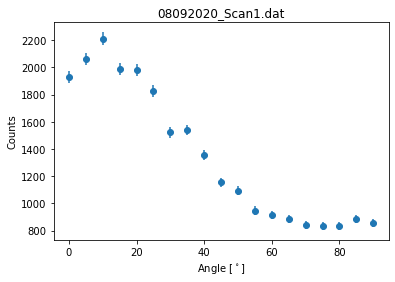

In [2]:
#let's plot this data as a simple scatter plot, just to make sure it looks like we'd expect
import matplotlib.pyplot as plt
import numpy as np

plt.errorbar(angle,counts,xerr=None,yerr=np.sqrt(counts),fmt = 'o')
plt.xlabel("Angle [$^\circ$]")
plt.ylabel("Counts")
plt.title(fileName)